<a href="https://colab.research.google.com/github/Nagib005/Inverse_Design/blob/main/train_small_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Dropout
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.optimizers import Adam


In [ ]:
# Load data
result = pd.read_csv("/content/drive/MyDrive/Square_inverse/result_V_small.csv", header=None).to_numpy()

# Split into input and output
x = result[:, 0:6]
y = result[:, 6:8]

# Train / Val / Test split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.30, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_val, y_val, test_size=0.50, shuffle=True)

# Normalize inputs
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_val = sc.transform(x_val)
x_test = sc.transform(x_test)

from sklearn.preprocessing import MinMaxScaler

y_scaler = MinMaxScaler()
y_train = y_scaler.fit_transform(y_train)
y_val = y_scaler.transform(y_val)
y_test = y_scaler.transform(y_test)


del result  # Free memory
print("✅ Data loaded and split.")


✅ Data loaded and split.


In [ ]:
Model = Sequential()
Model.add(Dense(5, input_dim=6))
Model.add(LeakyReLU(alpha=0.2)); Model.add(Dropout(0.1))
Model.add(Dense(10)); Model.add(LeakyReLU(alpha=0.2)); Model.add(Dropout(0.1))
Model.add(Dense(20)); Model.add(LeakyReLU(alpha=0.2)); Model.add(Dropout(0.1))
Model.add(Dense(40)); Model.add(LeakyReLU(alpha=0.2)); Model.add(Dropout(0.1))
Model.add(Dense(80)); Model.add(LeakyReLU(alpha=0.2)); Model.add(Dropout(0.1))
Model.add(Dense(160)); Model.add(LeakyReLU(alpha=0.2)); Model.add(Dropout(0.1))
Model.add(Dense(80)); Model.add(LeakyReLU(alpha=0.2)); Model.add(Dropout(0.1))
Model.add(Dense(40)); Model.add(LeakyReLU(alpha=0.2)); Model.add(Dropout(0.1))
Model.add(Dense(20)); Model.add(LeakyReLU(alpha=0.2)); Model.add(Dropout(0.1))
Model.add(Dense(10)); Model.add(LeakyReLU(alpha=0.2)); Model.add(Dropout(0.1))
Model.add(Dense(5));  Model.add(LeakyReLU(alpha=0.2))
Model.add(Dense(2))  # Final output
Model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 5)              │            35 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_22 (LeakyReLU)      │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_23 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_24 (LeakyReLU)      │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 40)             │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_25 (LeakyReLU)      │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 80)             │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_26 (LeakyReLU)      │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 160)            │        12,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_27 (LeakyReLU)      │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 80)             │        12,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_28 (LeakyReLU)      │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 40)             │         3,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_29 (LeakyReLU)      │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 20)             │           82

 Total params: 34,612 (135.20 KB)

 Trainable params: 34,612 (135.20 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Model.compile(loss='mae', optimizer=Adam(learning_rate=0.001))
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                 patience=5, min_lr=1e-6, verbose=1)

# ✅ 4. Train
history = Model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=200,
                    batch_size=64,
                    callbacks=[early_stop, lr_scheduler],
                    verbose=1)


Epoch 1/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.3603 - val_loss: 0.1909 - learning_rate: 0.0010
Epoch 2/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2185 - val_loss: 0.1736 - learning_rate: 0.0010
Epoch 3/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1993 - val_loss: 0.1705 - learning_rate: 0.0010
Epoch 4/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1890 - val_loss: 0.1681 - learning_rate: 0.0010
Epoch 5/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1839 - val_loss: 0.1603 - learning_rate: 0.0010
Epoch 6/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1750 - val_loss: 0.1552 - learning_rate: 0.0010
Epoch 7/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1699 - val_loss: 0.1447 - learning_rate: 0.0010
Epoch 8/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1696 - val_loss: 0.1460 - learning_rate: 0.0010
Epoch 9/200
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1650 - val_loss: 0.1485 - learning_rate: 0.0010
Epoch 10/200
53/

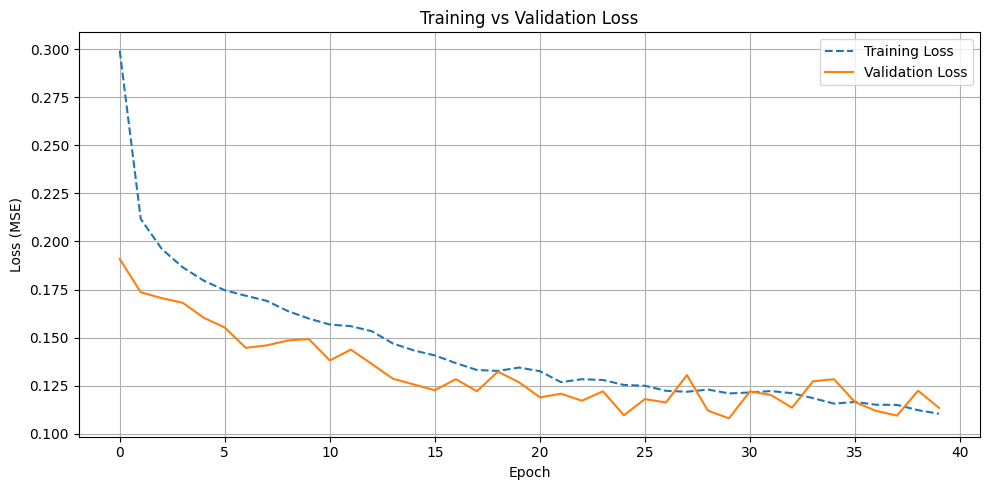

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', linestyle='--')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate
y_pred = Model.predict(x_test)
y_pred = y_scaler.inverse_transform(y_pred)
y_test = y_scaler.inverse_transform(y_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Test MSE: {mse:.6f}")
print(f"📊 Test R²: {r2:.4f}")


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
📉 Test MSE: 0.015317
📊 Test R²: 0.7484


In [ ]:
print("🔍 Sample Predictions:")
for i in range(10):
    print(f"True: {y_test[i]}, Predicted: {y_pred[i]}")


🔍 Sample Predictions:
True: [0.798  0.0595], Predicted: [0.7270982  0.12306875]
True: [0.4001 0.425 ], Predicted: [0.47752133 0.3776897 ]
True: [0.511  0.3198], Predicted: [0.43332434 0.33231416]
True: [0.0981 0.696 ], Predicted: [0.4038132  0.39756835]
True: [0.4734 0.4116], Predicted: [0.47206202 0.3843142 ]
True: [0.02582 0.6753 ], Predicted: [0.22239745 0.54173166]
True: [0.1782 0.6436], Predicted: [0.44145665 0.41022846]
True: [0.781  0.1024], Predicted: [0.78023255 0.09039252]
True: [0.653  0.2354], Predicted: [0.7076309  0.16760401]
True: [0.1694 0.569 ], Predicted: [0.21771882 0.5420454 ]


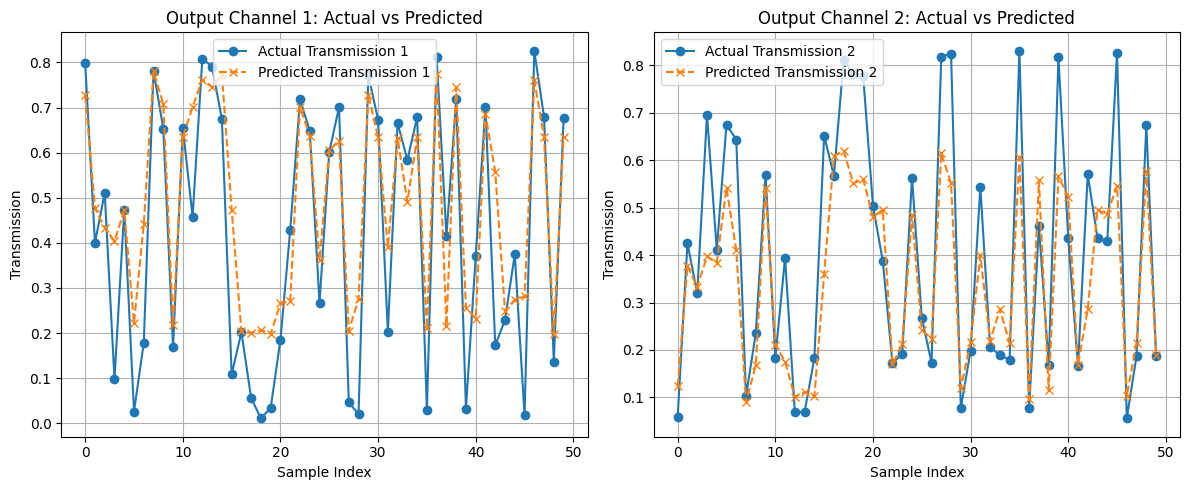

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Number of samples to visualize (adjust as needed)
N = 50

# Make sure y_test and y_pred are numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

plt.figure(figsize=(12, 5))

# Output 1 (e.g., Through port)
plt.subplot(1, 2, 1)
plt.plot(y_test[:N, 0], label='Actual Transmission 1', marker='o')
plt.plot(y_pred[:N, 0], label='Predicted Transmission 1', linestyle='--', marker='x')
plt.title("Output Channel 1: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Transmission")
plt.legend()
plt.grid(True)

# Output 2 (e.g., Drop port)
plt.subplot(1, 2, 2)
plt.plot(y_test[:N, 1], label='Actual Transmission 2', marker='o')
plt.plot(y_pred[:N, 1], label='Predicted Transmission 2', linestyle='--', marker='x')
plt.title("Output Channel 2: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Transmission")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
